In [1]:
!apt-get -qq install -y libgfortran4 gawk
!pip install -q pypka biopython

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [7]:
!python3 -m instal --user pypka biopython

/usr/bin/python3: No module named instal


In [8]:
from pypka import Titration
import Bio
from Bio.PDB import PDBList
import os

In [9]:
pdbl = PDBList()
pdbl.retrieve_pdb_file('4lzt', file_format="pdb", pdir='.')
os.rename('pdb4lzt.ent', '4lzt.pdb')

In [10]:
params = {
    'structure'     : '4lzt.pdb',    
    'pH'            : "0,14",
    'ncpus'         : 1,
    'epsin'         : 15,
    'ionicstr'      : 0.1,
    'pbc_dimensions': 0,
    'convergence'   : 0.1
}
sites = {
    'A': ['1N', '1', '7', '129C']
}

In [11]:
tit = Titration(params, sites=sites)  

Start Preprocessing


Exception: The following errors have been found on LOG_addHtaut: 
addHtaut: Error: Wrong number of arguments.


In [26]:
pH = 7.0
for site in tit:
    pK = round(site.pK, 1)
    state = site.getProtState(pH)[0]    
    print(f'{site.res_name} {site.res_number:10} {pK:5.1f} {state}')

NTR       2001   7.0 undefined
LYS          1  10.5 protonated
GLU          7   3.6 deprotonated
CTR       2129   2.6 deprotonated


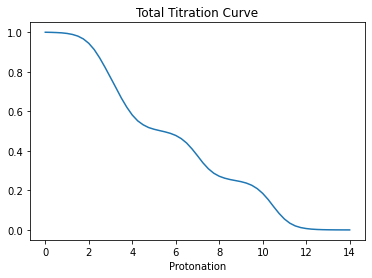

In [33]:
import matplotlib.pyplot as plt
tit_curve = tit.getTitrationCurve()
x = sorted(list(tit_curve.keys()))
y = [tit_curve[pH] for pH in x]
plt.title('Total Titration Curve')
plt.xlabel('pH')
plt.xlabel('Protonation')
plt.plot(x, y)
plt.show()